In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv(r"C:\Users\bhbt\Desktop\uber-data-sep2014.csv")

# Modify the date format from month/day/year to day-month-year
data["Date/Time"] = data["Date/Time"].map(pd.to_datetime) 
data


,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764


- Information about our data

   - date/time: date/time

    - Lat: latitude coordinates

    - Color: longitude coordinates

    - Base: trip number

- Now we will create additional features to help us analyze trips better, which are as follows:

       - Day: monthly days from 01 to 31

       - Weekday: days of the week 0 to 6

       - Hour: The hour represents 24 units

In [4]:

# Create new columns for trip information
data["Day"] = data["Date/Time"].apply(lambda x: x.day)
data["Weekday"] = data["Date/Time"].apply(lambda x: x.weekday())
data["Hour"] = data["Date/Time"].apply(lambda x: x.hour)

data.tail()



,Date/Time,Lat,Lon,Base,Day,Weekday,Hour
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,30,1,22
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,30,1,22
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,30,1,22
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,30,1,22
1028135,2014-09-30 22:58:00,40.7140,-73.9496,B02764,30,1,22


- Now we will convert the numerical values ​​of the days of the week into written values ​​by taking any date, let it be 01-09-2014, and searching for it on the Internet, and we will know through it the corresponding day of the week, which is Wednesday, its corresponding number in the weekday column is the number 2.

0 - Monday , 

1 -> Tuesday

In [5]:
#From the previous information, we can deduce the days in the weekday column and convert them to the following form:

data["Weekday"] = data["Weekday"].replace([0, 1, 2, 3, 4, 5, 6], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

#
data.tail()


,Date/Time,Lat,Lon,Base,Day,Weekday,Hour
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,30,Tuesday,22
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,30,Tuesday,22
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,30,Tuesday,22
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,30,Tuesday,22
1028135,2014-09-30 22:58:00,40.7140,-73.9496,B02764,30,Tuesday,22


تحليل رحلات أوبر في شهر سبتمبر لعام 2014


In [11]:
data.info

<bound method DataFrame.info of                   Date/Time      Lat      Lon    Base  Day  Weekday  Hour
0       2014-09-01 00:01:00  40.2201 -74.0021  B02512    1   Monday     0
1       2014-09-01 00:01:00  40.7500 -74.0027  B02512    1   Monday     0
2       2014-09-01 00:03:00  40.7559 -73.9864  B02512    1   Monday     0
3       2014-09-01 00:06:00  40.7450 -73.9889  B02512    1   Monday     0
4       2014-09-01 00:11:00  40.8145 -73.9444  B02512    1   Monday     0
...                     ...      ...      ...     ...  ...      ...   ...
1028131 2014-09-30 22:57:00  40.7668 -73.9845  B02764   30  Tuesday    22
1028132 2014-09-30 22:57:00  40.6911 -74.1773  B02764   30  Tuesday    22
1028133 2014-09-30 22:58:00  40.8519 -73.9319  B02764   30  Tuesday    22
1028134 2014-09-30 22:58:00  40.7081 -74.0066  B02764   30  Tuesday    22
1028135 2014-09-30 22:58:00  40.7140 -73.9496  B02764   30  Tuesday    22

[1028136 rows x 7 columns]>

<Axes: xlabel='Day', ylabel='Count'>

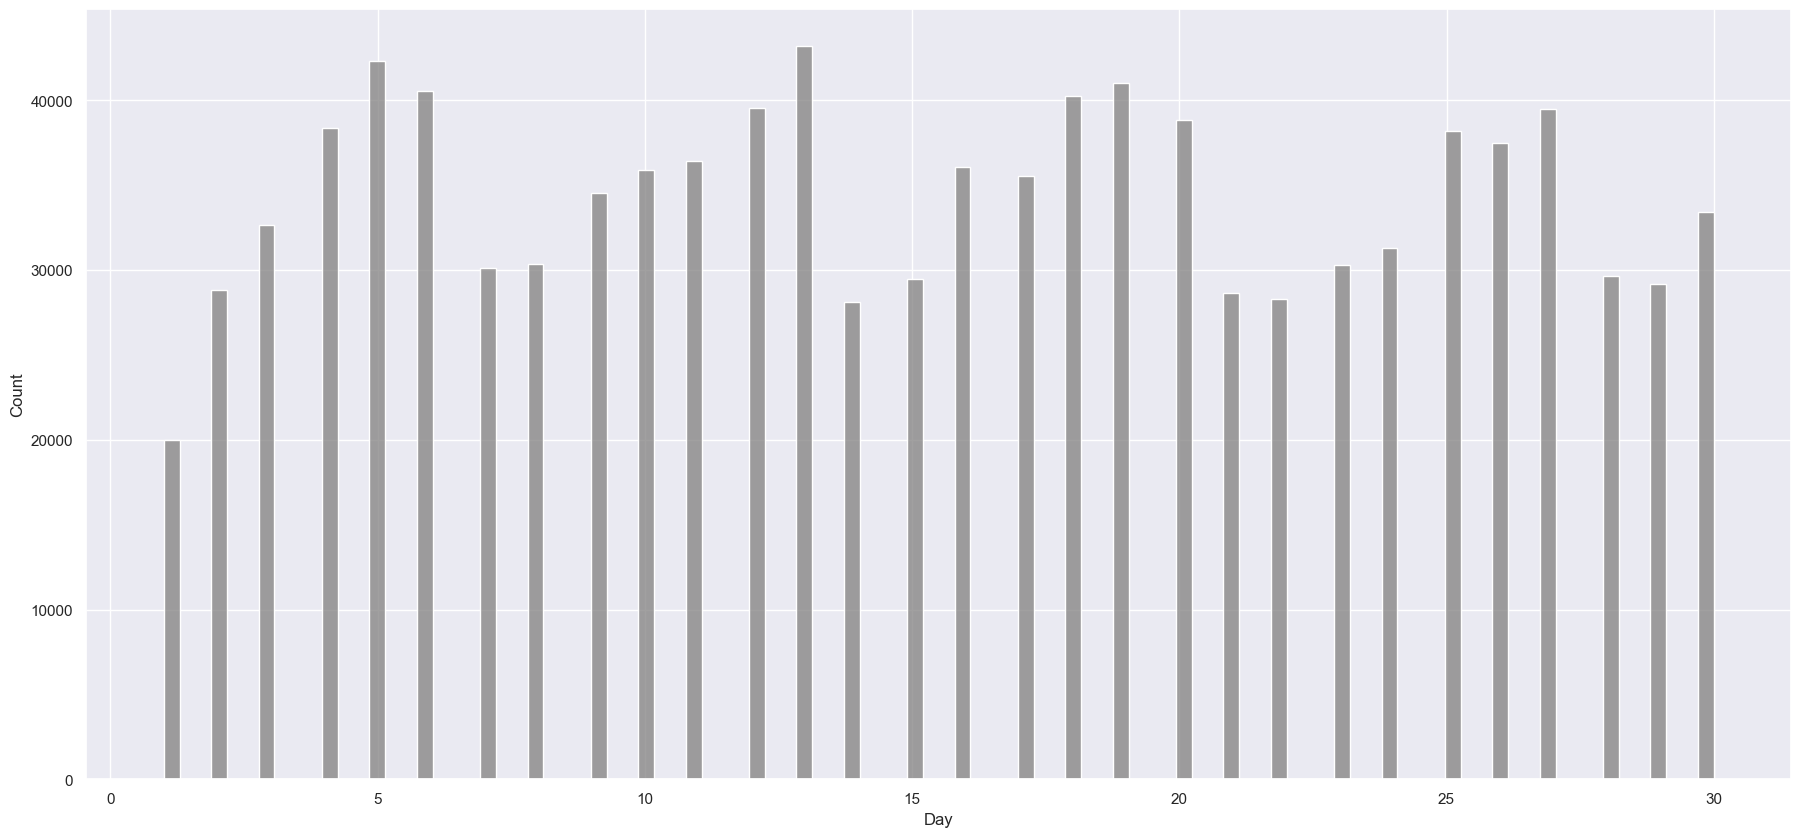

In [30]:
sns.set(rc={'figure.figsize':(22, 10)})
sns.histplot(x=data["Day"], color='#828180')



ما نلاحظه بالشكل أعلاه أن الرحلات ترتفع بشكل تدريجي من بداية الأسبوع حتى نهايته حيث أن عدد الرحلات في تاريخ 01-09-2014 هو 20000 رحلة والموافق ليوم الاثنين وهو بداية الأسبوع في نيويورك ويرتفع إلى أن يصل لأكثر من 40000 في نهاية الأسبوع.

الآن سنقوم بدراسة عدد الرحلات خلال أيام الأسبوع في شهر سبتمبر

<Axes: xlabel='Weekday', ylabel='Count'>

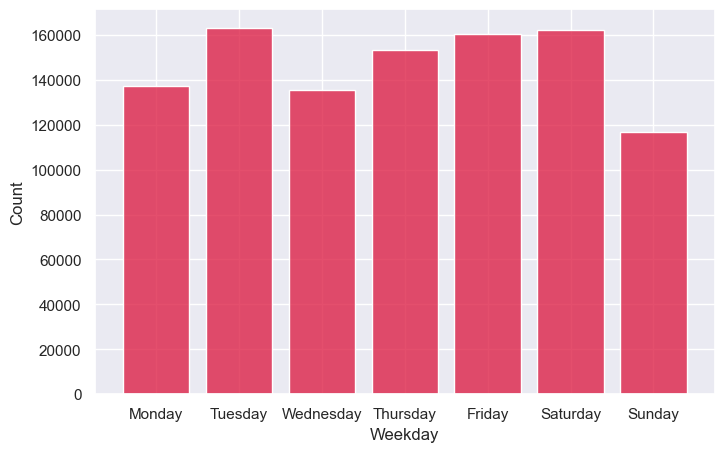

In [7]:
sns.set(rc={'figure.figsize':(8,5)})
sns.histplot(data["Weekday"], shrink=.8, color='crimson')

نلاحظ من الشكل أعلاه ، أنه على مدى الشهر بأكمله الأيام الأكثر من حيث عدد الرحلات مرتبة ترتيبًا تنازليًا :

- الثلاثاء (الأكثر)
- السبت
- الجمعة
- الخميس
- الإثنين
- الأربعاء
- الأحد (الأقل)
  
يبدو أن الناس في نيويورك يفضلون الاستراحة في منازلهم يوم الأحد للاستعداد لأسبوع مليء بالأعمال 💼.

أما الآن سندرس ساعات الذروة والتي تمثل أكبر عدد من الطلبات على رحلات أوبر خلال اليوم

C:\Users\bhbt\AppData\Local\Temp\ipykernel_30284\1539173589.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Hour"], color='darkred')


<Axes: xlabel='Hour', ylabel='Density'>

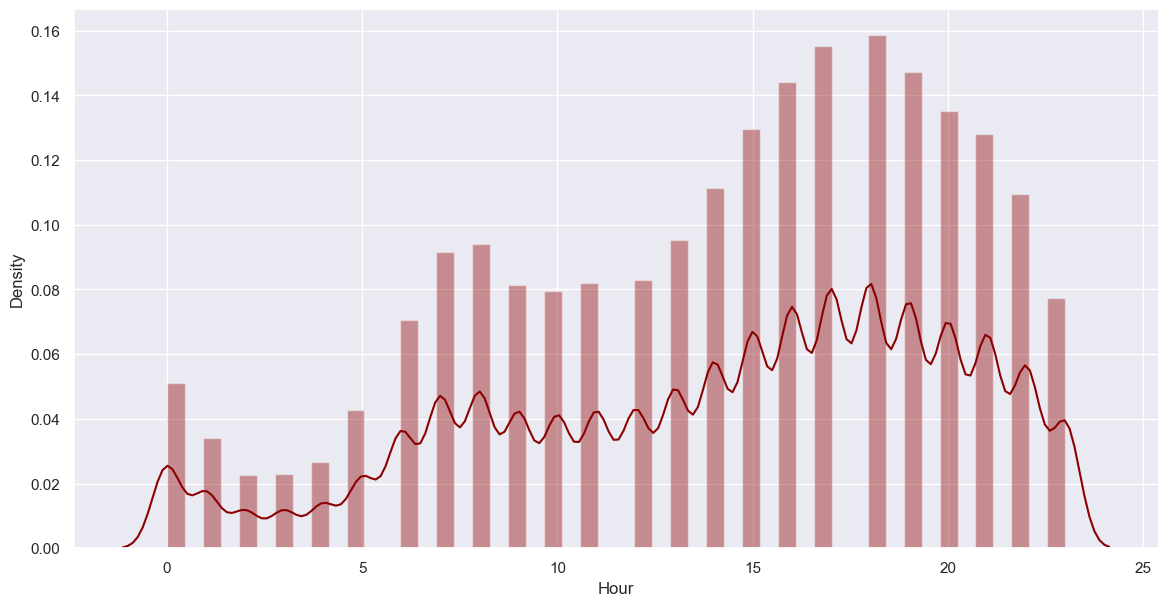

In [31]:
sns.set(rc={'figure.figsize':(14,7)})
sns.distplot(data["Hour"], color='darkred')

نلاحظ أن ساعات الذروة تمتد من الساعة 15:00 إلى 21:00 أي من الساعة 03:00 م إلى الساعة 9:00 م وأقصى ساعة ذروة في اليوم هي عند الساعة 18:00 أي الساعة 6:00 م.

نظرًا لأننا نمتلك بيانات حول خطوط الطول والعرض ، فيمكننا أيضًا رسم كثافة رحلات أوبر Uber وفقًا للمناطق الموجودة في مدينة نيويورك:

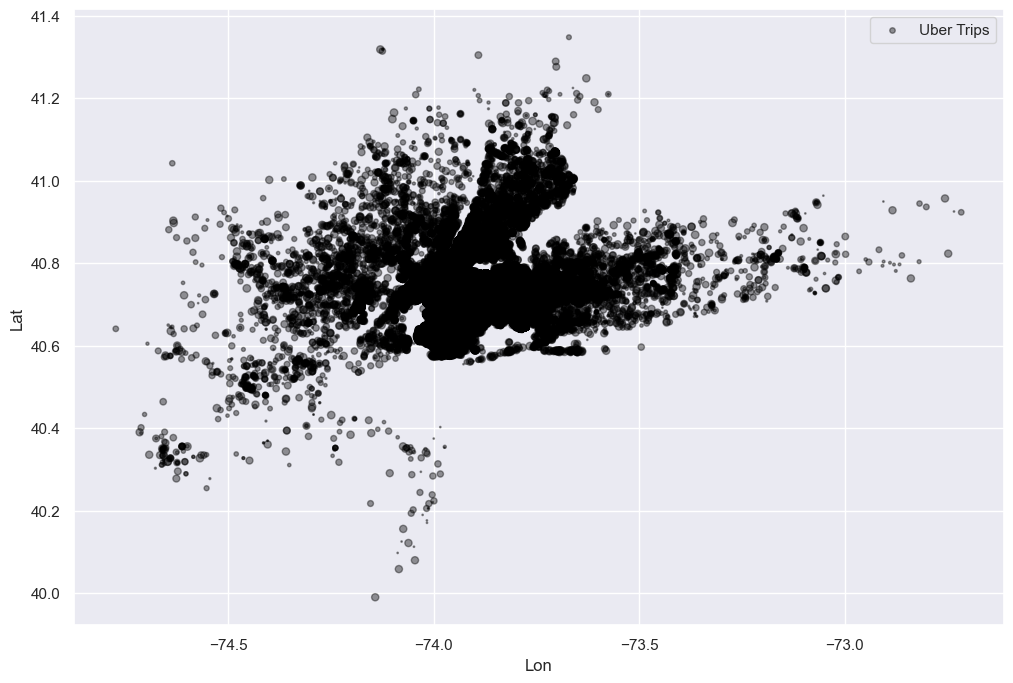

In [10]:
data.plot(kind='scatter', x='Lon', y='Lat', alpha=0.4, s=data['Day'], label='Uber Trips',figsize=(12, 8), color='black')
plt.show()

نلاحظ أن المنطقة الأكثر طلبًا لخدمات أوبر هي منتصف مدينة نيويورك والتي تعرف بالميد تاون في مانهاتن
- والتي تقع بين خط طول73.99- و وخط عرض 40.75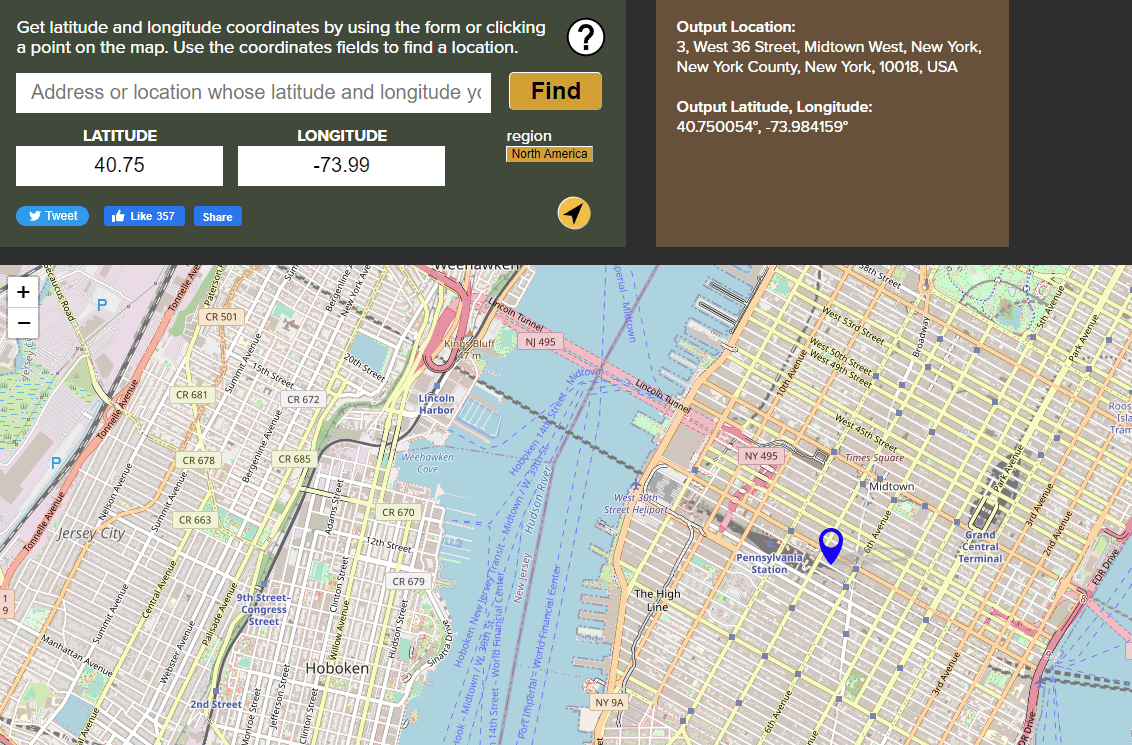


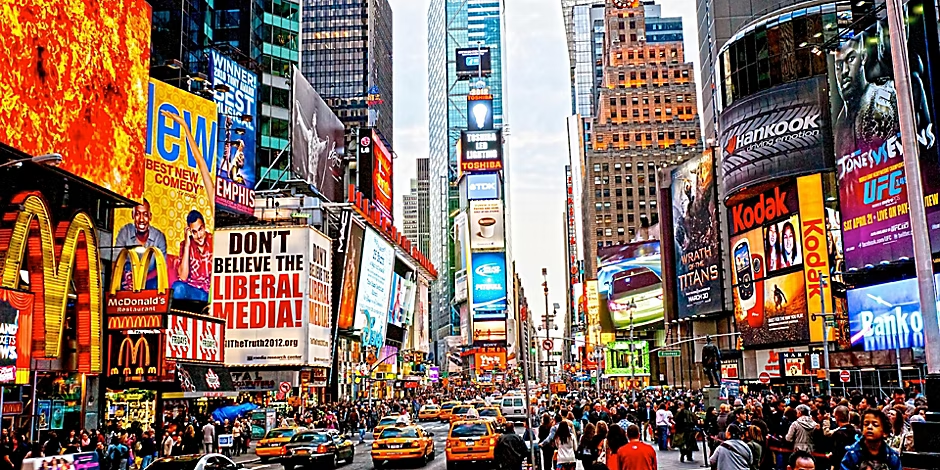


ملخص التحليل
- 
قد تناولنا في هذا الدرس التقني بعض الطرق التي يمكننا بها تحليل رحلات أوبر باستخدام لغة بايثون وهنا بعض الاستنتاجات التي حصلنا عليها- 

يوم الثلاثاء هو اليوم الأكثر ربحًا لشركة اوبر في شهر سبتم- بر

عدد الرحلات ترتفع بشكل تدريجي من بداية الأسبوع حتى نها- يته.

في أيام الأحد، يستخدم عدد أقل من الأشخاص خدمة-  أوبر.

الساعة السادسة 6:00 مساءً هي ساعة الذروة القصوى لخدمة أوبر في مدينة - نيويورك.

تبدأ معظم رحلات أوبر بالقرب من منطقة مانهاتن في نيويورك.